In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data_tau_ta.csv')

In [6]:
df.head()

,title,date,days,tokens,stem,lemma,pos_tags,named_entities
0,10 Years of Open Source Machine Learning,7 points by tstonez 19 hours ago | 1 comment,1,"10,years,open,source,machine,learning",10 Years of Open Source Machine Learn,10 Years of Open Source Machine Learning,"[('10', 'CD'), ('Years', 'NNS'), ('of', 'IN'),...",['Open Source Machine']
1,What machines can learn from Apple Watch: dete...,2 points by koukouhappy 7 hours ago | discuss,1,"machines,learn,apple,watch,detecting,undiagnos...",What machines can learn from Apple Watch: dete...,What machines can learn from Apple Watch: dete...,"[('What', 'WP'), ('machines', 'NNS'), ('can', ...",['Apple Watch']
2,The Deep Roots of Javascript Fatigue,3 points by nikkielizdemere 13 hours ago | di...,1,"deep,roots,javascript,fatigue",The Deep Roots of Javascript Fatigu,The Deep Roots of Javascript Fatigue,"[('The', 'DT'), ('Deep', 'NNP'), ('Roots', 'NN...","['Deep Roots', 'Javascript Fatigue']"
3,Data science intro for math/phys background,9 points by pmigdal 1 day ago | discuss,1,"data,science,intro,math,phys,background",Data science intro for math/phys background,Data science intro for math/phys background,"[('Data', 'NNP'), ('science', 'NN'), ('intro',...",['Data']
4,"Data Science Pop-Up in Austin, TX",2 points by AnnaOnTheWeb 13 hours ago | discuss,1,"data,science,pop,austin,tx","Data Science Pop-Up in Austin, TX","Data Science Pop-Up in Austin, TX","[('Data', 'NNP'), ('Science', 'NNP'), ('Pop', ...","['Data Science Pop', 'Austin']"


In [7]:
df.shape

(180, 8)

In [8]:
import nltk

In [9]:
from nltk.corpus import stopwords

In [10]:
stop = stopwords.words('english')

In [11]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-'))

In [12]:
tokens_list = df['tokens'].tolist()

In [16]:
frequency_words = {}
for data in tokens_list:
    data_list = data.split(',')
    for token in data_list:
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1
    


In [17]:
frequency_words

{'': 1,
 '#': 1,
 '&': 1,
 '***': 1,
 '+': 2,
 '++': 1,
 '.*:': 1,
 '0': 2,
 '1': 5,
 '10': 1,
 '101': 1,
 '16': 1,
 '2': 5,
 '2016': 2,
 '3': 3,
 '4': 1,
 '5': 1,
 '50': 3,
 '675': 1,
 '7': 1,
 '88': 1,
 '8m': 1,
 '??': 1,
 '???': 3,
 '@': 2,
 'access': 1,
 'affect': 1,
 'age': 1,
 'agree': 1,
 'aka': 1,
 'algorithms': 1,
 'almost': 1,
 'alphago': 1,
 'amazon': 1,
 'analogies': 1,
 'analysis': 11,
 'analytical': 1,
 'analytics': 1,
 'analyzer': 1,
 'analyzing': 3,
 'ancient': 1,
 'animated': 1,
 'announcing': 2,
 'answers': 1,
 'anywhere': 1,
 'apache': 6,
 'api': 4,
 'app': 1,
 'apple': 1,
 'applied': 1,
 'archive': 1,
 'arrow': 1,
 'art': 1,
 'article': 1,
 'artificial': 2,
 'artists': 1,
 'ask': 2,
 'asked': 1,
 'austin': 1,
 'authoring': 1,
 'auto': 1,
 'automate': 1,
 'automated': 1,
 'aws': 1,
 'aylien': 1,
 'b': 2,
 'background': 1,
 'ballr': 1,
 'based': 2,
 'basket': 1,
 'bay': 1,
 'bayesian': 5,
 'become': 1,
 'beginners': 1,
 'bengio': 1,
 'best': 1,
 'better': 2,
 'big': 4

In [18]:
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [19]:
df_tfidf.head()

,word,tf
0,neighbors,1
1,,1
2,code,4
3,similarity,1
4,dezyre,1


In [20]:
df_tfidf.sort(ascending=False,columns='tf',inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [21]:
df_tfidf.head()

,word,tf
157,data,42
414,learning,28
125,science,21
183,machine,16
608,deep,11


In [39]:
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [40]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [41]:
df_tfidf.head()

,word,tf,document_count
157,data,42,46
414,learning,28,28
125,science,21,21
183,machine,16,17
608,deep,11,12


In [42]:
# we already have the count of all the documents
total_docs = df.shape[0]

In [52]:
total_docs

180

** let us compute the tfidf ** 

**tfidf = tf . idf**

**idf = log(total_docs/number of documents that contain the word)**

In [101]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [102]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [103]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [104]:
df_tfidf.head()

,word,tf,document_count,tfidf
32,p,2,126,0.0
300,r,11,160,0.0
397,c,1,140,0.0
1,,1,180,0.0
251,g,1,134,0.0


In [105]:
df_tfidf.tail()

,word,tf,document_count,tfidf
477,analysis,11,11,13.245320
183,machine,16,17,16.000000
125,science,21,21,18.964890
157,data,42,46,20.039093
414,learning,28,28,21.788235


In [106]:
df_tfidf.sort(columns='tfidf',ascending=True,inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [107]:
df_tfidf.head()

,word,tf,document_count,tfidf
32,p,2,126,0.0
300,r,11,160,0.0
397,c,1,140,0.0
1,,1,180,0.0
251,g,1,134,0.0


In [108]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

** now let us plot a word cloud to see the prominence of the word **

In [109]:
wordcloud = WordCloud()

In [110]:
word_tfidf = df_tfidf.set_index('word')['tfidf'].to_dict()

In [111]:
word_tfidf

{'': 0.10000000000000001,
 '#': 2.255272505103306,
 '&': 2.255272505103306,
 '***': 2.255272505103306,
 '+': 3.5563025007672873,
 '++': 2.255272505103306,
 '.*:': 2.255272505103306,
 '0': 2.6020599913279625,
 '1': 6.0205999132796242,
 '10': 1.9542425094393248,
 '101': 2.255272505103306,
 '16': 1.7781512503836436,
 '2': 6.2763625255165305,
 '2016': 3.9084850188786495,
 '3': 4.1938200260161134,
 '4': 1.7781512503836436,
 '5': 1.4771212547196624,
 '50': 4.959637541326031,
 '675': 2.255272505103306,
 '7': 1.9542425094393248,
 '88': 2.255272505103306,
 '8m': 2.255272505103306,
 '??': 1.6532125137753437,
 '???': 5.3344537511509307,
 '@': 3.9084850188786495,
 'access': 2.255272505103306,
 'affect': 2.255272505103306,
 'age': 1.3979400086720377,
 'agree': 2.255272505103306,
 'aka': 2.255272505103306,
 'algorithms': 2.255272505103306,
 'almost': 2.255272505103306,
 'alphago': 2.255272505103306,
 'amazon': 2.255272505103306,
 'analogies': 2.255272505103306,
 'analysis': 13.245319809215173,
 'ana

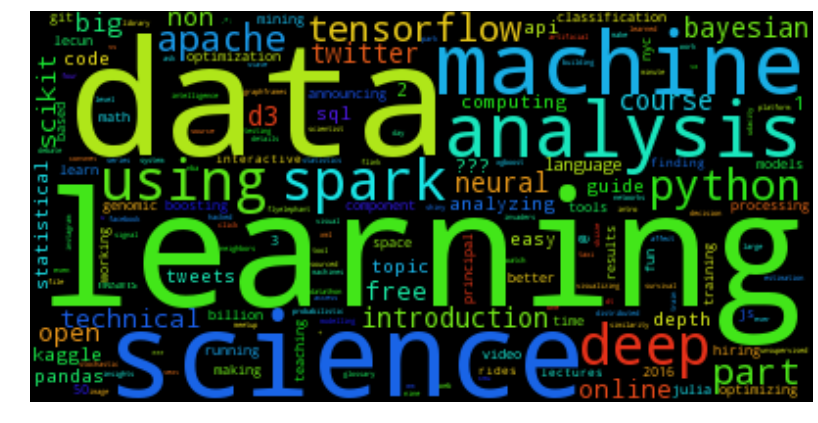

In [112]:
wordcloud.generate_from_frequencies(word_tfidf.items())
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()